# P5. Proximal Gradient and LASSO

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

#  convert to a column vector
def MakeCol(y): return y.reshape(-1,1)
#  convert to a row vector
def MakeRow(y): return y.reshape(1,-1)
# find non zero/true elements
def find(x): return np.nonzero(x)[0]

In [2]:
# Use this code to read from a CSV file.
import pandas as pd
U = pd.read_csv('data/space_ga.csv', delimiter=';')

class_names = list(U.columns)
Ay = U.to_numpy()

In [3]:
# Shuffle
Ay = Ay[np.random.permutation(Ay.shape[0]),:]
# Separation features X / donnees y
A_full = Ay[:,1:];
y_full = MakeCol( Ay[:,0] )

n_train = 2170
n_test = 937
A_train = A_full[:n_train, :]
A_test = A_full[n_train:,:]
y_train = y_full[:n_train,:]
y_test = y_full[n_train:,:]

A, A1, y, y1 = A_train, A_test, y_train, y_test

# Centrer données
mA = A.mean(axis=0)
sA = A.std(axis=0)
A = (A-mA)/sA
A1 = (A1-mA)/sA

m = y.mean()
y = y-m
y1 = y1-m

In [34]:
# 
def f(A,x,y): return 1/(2*len(y))*np.linalg.norm(A.dot(x)-y)**2
def Gradf(A,x,y): return 1/(len(y))*A.transpose().dot(A.dot(x)-y) 

In [41]:
iter0 = 100000
exo0 = np.zeros((2, iter0))
p = 6
x = np.zeros((p,1))
tau_mult = 0.0002160015963797798

for j in range(iter0):
    exo0[0,j] = f(A,x, y)
    exo0[1,j] = f(A1,x, y1)
    x = x - tau_mult * Gradf(A, x, y)

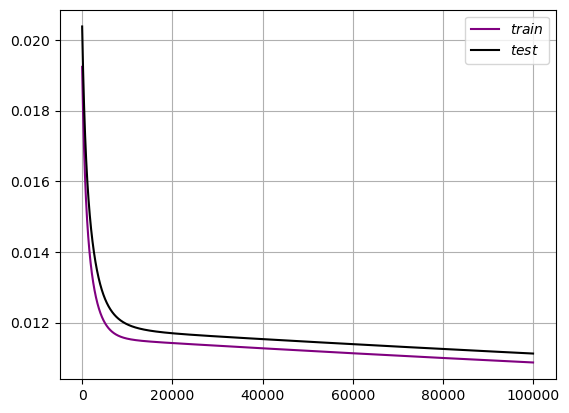

In [42]:
alliter0 = [i for i in range(iter0)]
plt.clf()
plt.plot(alliter0, exo0[0,:], color='purple', label=r'$train$')
plt.plot(alliter0, exo0[1,:], color='black', label=r'$test$')
plt.legend()
plt.grid()
plt.show()

## Q1. L2 regularization

$$f(x) = \frac{1}{2} ||Ax-y||_2^2 + \frac{\lambda}{2} ||x||_2^2$$

$$\nabla f(x) = A^T (Ax-y) + \lambda x$$

In [71]:
# ridge penalty
lmbda_pen = 1e-4

# 
def f_l2(A,x,y): return 1/(2*len(y))*np.linalg.norm(A.dot(x)-y)**2 + lmbda_pen/2 * np.linalg.norm(x)**2
def Gradf_l2(A,x,y): return (1/len(y))*A.transpose().dot(A.dot(x)-y) + lmbda_pen*x

In [72]:
exo1 = np.zeros((2, iter0))
p = 6
x = np.zeros((p,1))
tau_mult = 0.0002160015963797798

for j in range(iter0):
    exo1[0,j] = f_l2(A,x, y)
    exo1[1,j] = f_l2(A1,x, y1)
    x = x - tau_mult * Gradf_l2(A, x, y)

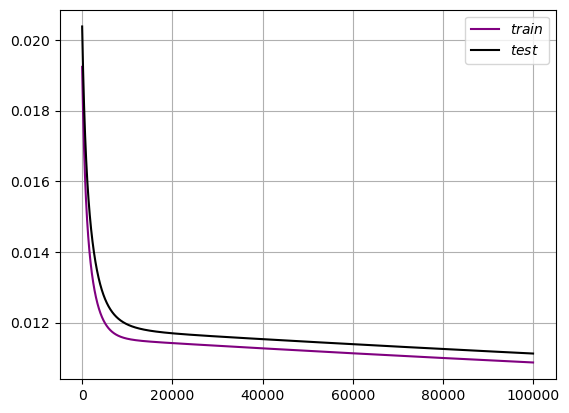

In [73]:
alliter0 = [i for i in range(iter0)]
plt.clf()
plt.plot(alliter0, exo1[0,:], color='purple', label=r'$train$')
plt.plot(alliter0, exo1[1,:], color='black', label=r'$test$')
plt.legend()
plt.grid()
plt.show()

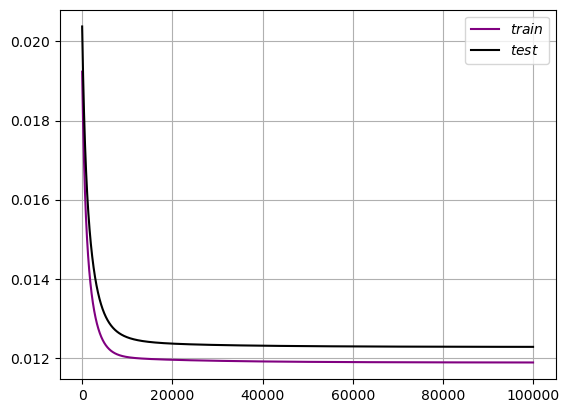

In [75]:
lmbda_pen = 1e-1

# 
def f_l2(A,x,y): return 1/(2*len(y))*np.linalg.norm(A.dot(x)-y)**2 + lmbda_pen/2 * np.linalg.norm(x)**2
def Gradf_l2(A,x,y): return (1/len(y))*A.transpose().dot(A.dot(x)-y) + lmbda_pen*x

exo1 = np.zeros((2, iter0))
p = 6
x = np.zeros((p,1))
tau_mult = 0.0002160015963797798

for j in range(iter0):
    exo1[0,j] = f_l2(A,x, y)
    exo1[1,j] = f_l2(A1,x, y1)
    x = x - tau_mult * Gradf_l2(A, x, y)
    
alliter0 = [i for i in range(iter0)]
plt.clf()
plt.plot(alliter0, exo1[0,:], color='purple', label=r'$train$')
plt.plot(alliter0, exo1[1,:], color='black', label=r'$test$')
plt.legend()
plt.grid()
plt.show()

## Q2. L1 regularization

$$f(x) = \frac{1}{2} ||Ax - y||_2^2 + \rho ||x||_1$$

$$\nabla f(x) = A^T (Ax - y) + \rho .sign(x)$$

In [56]:
# ridge penalty
rho_pen = 1e-4

# 
def f_l1(A,x,y): return 1/(2*len(y))*np.linalg.norm(A.dot(x)-y)**2 + rho_pen * np.sum(np.abs(x))
def Gradf_l1(A,x,y): return 1/len(y)*A.transpose().dot(A.dot(x)-y) + rho_pen*np.sign(x)

In [61]:
exo2 = np.zeros((2, iter0))
p = 6
x = np.zeros((p,1))
tau_mult = 0.02

for j in range(iter0):
    exo2[0,j] = f_l1(A,x, y)
    exo2[1,j] = f_l1(A1,x, y1)
    x = x - tau_mult * Gradf_l1(A, x, y)

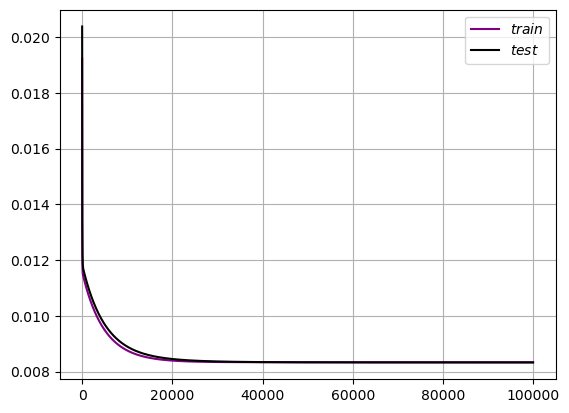

In [62]:
alliter0 = [i for i in range(iter0)]
plt.clf()
plt.plot(alliter0, exo2[0,:], color='purple', label=r'$train$')
plt.plot(alliter0, exo2[1,:], color='black', label=r'$test$')
plt.legend()
plt.grid()
plt.show()

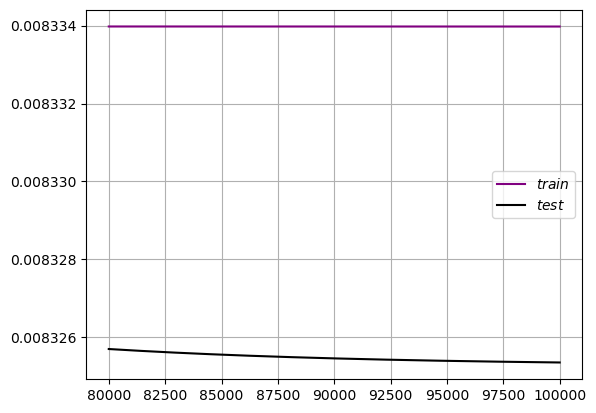

In [66]:
alliter0 = [i for i in range(iter0)]
plt.clf()
plt.plot(alliter0[80000:], exo2[0,80000:], color='purple', label=r'$train$')
plt.plot(alliter0[80000:], exo2[1,80000:], color='black', label=r'$test$')
plt.legend()
plt.grid()
plt.show()